In [2]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# get all the csv from the path
path = "../data/all_qt/"

all_files = os.listdir(path)
all_file_names = [f for f in all_files if f.endswith('.csv')]

# remove the _quantification part from the file names
data_list = [f.split('_quantification')[0] for f in all_file_names]
print(data_list)

all_files = [os.path.join(path, f) for f in all_file_names]
# create a list of dataframes
dfs = []

# loop through the files and read them into a dataframe
for file in all_files:
    # read the csv file
    df = pd.read_csv(file)
    # append the dataframe to the list
    dfs.append(df)

['myeloma_IMC', 'cHL_CODEX', 'healthy_bone_marrow', 'breast_fibro_IMC', 'cHL_2_MIBI', 'cHL_1_MIBI', 'IMMUcan', 'feto_maternal']


In [7]:
all_files

['../data/all_qt/myeloma_IMC_quantification.csv',
 '../data/all_qt/cHL_CODEX_quantification.csv',
 '../data/all_qt/healthy_bone_marrow_quantification.csv',
 '../data/all_qt/breast_fibro_IMC_quantification.csv',
 '../data/all_qt/cHL_2_MIBI_quantification.csv',
 '../data/all_qt/cHL_1_MIBI_quantification.csv',
 '../data/all_qt/IMMUcan_quantification.csv',
 '../data/all_qt/feto_maternal_quantification.csv']

In [17]:
dfs[0].head()

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,eccentricity,sample_id,disease,patient_ID,disease2,distance_to_bone_corrected,cellcharter_CN,level_1_cell_type,level_2_cell_type,cell_type
0,3.081162,2.445452,4.914248,3.262659,0.998546,1.111457,3.863021,1.563304,1.941053,2.574781,...,0.874985,TS-373_IMC38_B_002.csv,MM_BD,IMC38,MM_BD,119.816526,adaptive_immune,Immune,Myeloid_immune,Macrophage
1,1.449686,1.445057,3.864532,1.809677,0.230983,0.228769,2.065104,0.610242,1.205404,1.476939,...,0.678103,TS-373_IMC38_B_002.csv,MM_BD,IMC38,MM_BD,460.908885,stroma_adipocyte,Immune,Lymphoid_immune,Plasma_cell
2,2.286256,2.080325,4.303116,2.380829,0.659623,0.742665,3.227469,0.850710,1.449479,1.801367,...,0.957489,TS-373_IMC38_B_002.csv,MM_BD,IMC38,MM_BD,259.138959,stroma_adipocyte,Immune,Lymphoid_immune,Plasma_cell
3,1.698429,2.508642,4.809707,2.022134,0.814226,0.279389,2.740041,0.786641,1.405506,0.985527,...,0.901851,TS-373_IMC38_B_002.csv,MM_BD,IMC38,MM_BD,73.109507,stroma_adipocyte,Immune,Lymphoid_immune,Plasma_cell
4,3.502561,2.346567,4.019302,2.681798,4.687031,1.981153,3.708386,0.752709,4.973332,3.171923,...,0.728936,TS-373_IMC38_B_002.csv,MM_BD,IMC38,MM_BD,61.911227,bone_myeloid,Immune,Myeloid_immune,Neutrophil


In [8]:
dfs[0]["cell_type"]

0         Macrophage
1        Plasma_cell
2        Plasma_cell
3        Plasma_cell
4         Neutrophil
            ...     
76382      undefined
76383    CD8+_T_cell
76384    Plasma_cell
76385      undefined
76386    Plasma_cell
Name: cell_type, Length: 76387, dtype: object

In [ ]:
# list all the cell types over all the datframes
cell_types = []

for df in dfs:
    # get the cell types
    cell_types += df["cell_type"].unique().tolist()
# remove duplicates
cell_types = list(set(cell_types))
# remove the empty string
cell_types = [x for x in cell_types if x != ""]

In [10]:
cell_types

['THY1+ MSC',
 'Plasmacytoid_dendritic_cell',
 'SPINK2+ HSPC',
 'Adipocyte',
 'NK1',
 'Neutrophil',
 'Endothelial',
 'vCAF',
 'GATA1neg_Mks',
 'Stroma',
 'M2a_Macrophage',
 'Mature Myeloid',
 'EVT1b',
 'Blood',
 'Myofibroblasts',
 'CD44+ Undetermined',
 'Fibroblast',
 'NK3',
 'Macrophage',
 'Monocyte',
 'ki67_CD4',
 'CD4+_T_cell',
 'NK4',
 'HSC',
 'M1a_Macrophage',
 'EVT1a',
 'SMA+_Fibroblast',
 'Plasma_cell',
 'CD8_CXCL13',
 'Dendritic_cell',
 'Erythroid',
 'VSMC',
 'undefined',
 'GMP',
 'CD4_CXCL13',
 'Early Myeloid Progenitor',
 'HEV',
 'ki67_CD8',
 'GMP/Myeloblast',
 'Seg Artifact',
 'M2b_Macrophage',
 'Immature_B_cell',
 'Myeloid',
 'hypoxic Cancer',
 'Osteoclast',
 'Cancer',
 'hypoxia',
 'CXCL13_CAF',
 'Autofluorescent',
 'CD34+ CD61+',
 'Osteocyte',
 'Cytotoxic_CD8+_T_cell',
 'CD34_CAF',
 'M1_Macrophage',
 'CCL21_CAF',
 'BnT',
 'Erythroblast',
 'B_cell',
 'Non-classical_Monocyte',
 'Artifact',
 'Adipo-MSC',
 'Schwann Cells',
 'CD4_Treg',
 'GATA1pos_Mks',
 'Treg',
 'muscle',
 'FN

In [ ]:
# remap cell type names in each dataframe 
cell_types_df["cell_type"] = cell_types_df["cell_type"].replace(
    {
        "BnT": "B_and_T_cell",
        "B_cells": "B_cell",
        "GMP": "GMP/Myeloblast",
        "HSC": "HSCs",
        "unedfined": "undefined"
    }
)

## cell type composition per datset

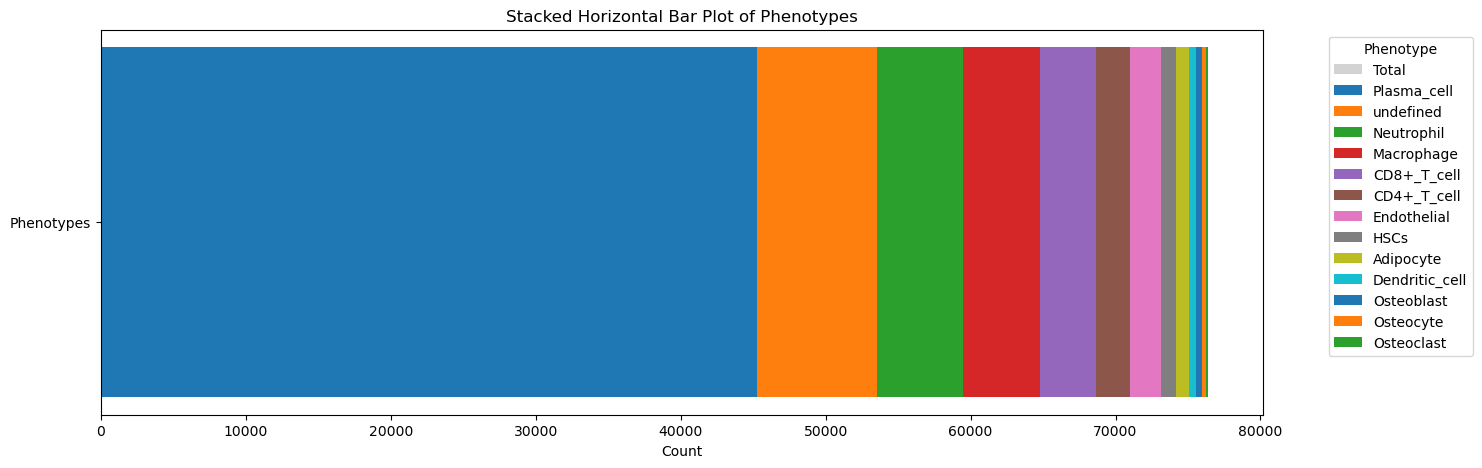

In [12]:
# Plot a stacked bar for the phenotype
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each phenotype
phenotype_counts = dfs[0]['cell_type'].value_counts()

# Create a single stacked horizontal bar plot with slimmer bars
plt.figure(figsize=(15, 5))
plt.barh(['Phenotypes'], [phenotype_counts.sum()], color='lightgray', label='Total', height=0.4)

# Add individual segments for each phenotype
left = 0
for phenotype, count in phenotype_counts.items():
    plt.barh(['Phenotypes'], [count], left=left, label=phenotype, height=0.4)
    left += count

# Add legend and labels
plt.title('Stacked Horizontal Bar Plot of Phenotypes')
plt.xlabel('Count')
plt.legend(title='Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

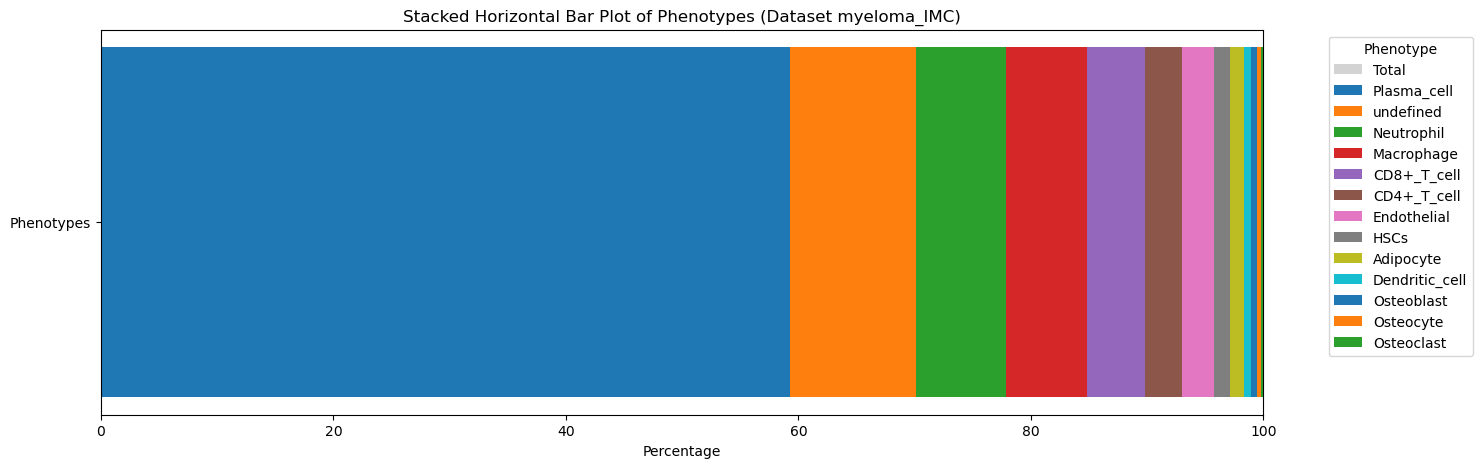

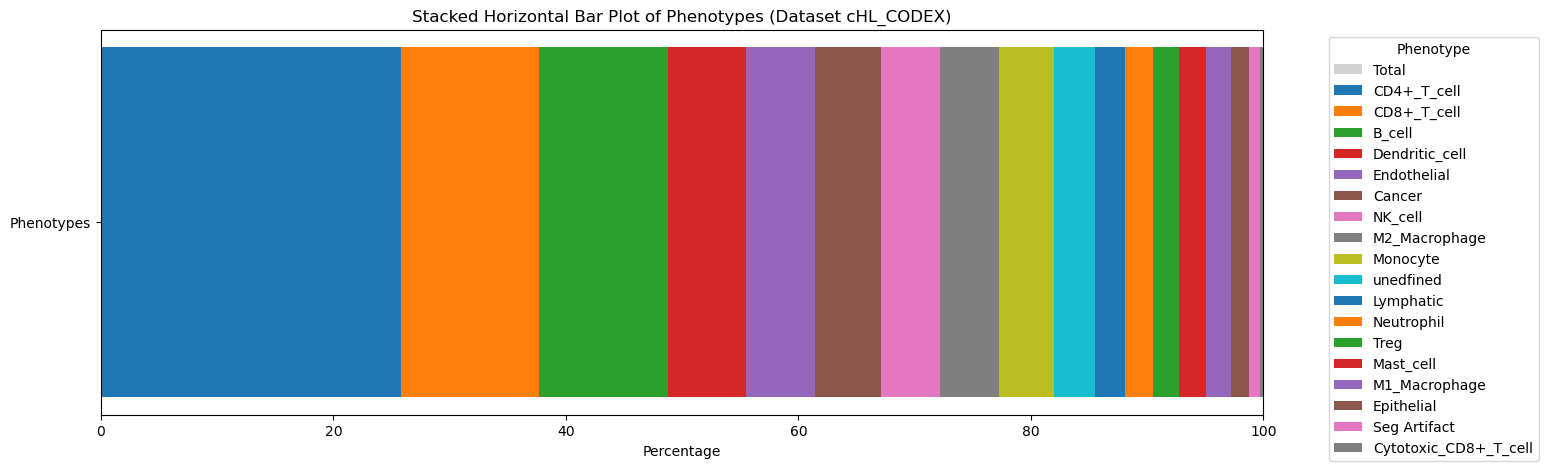

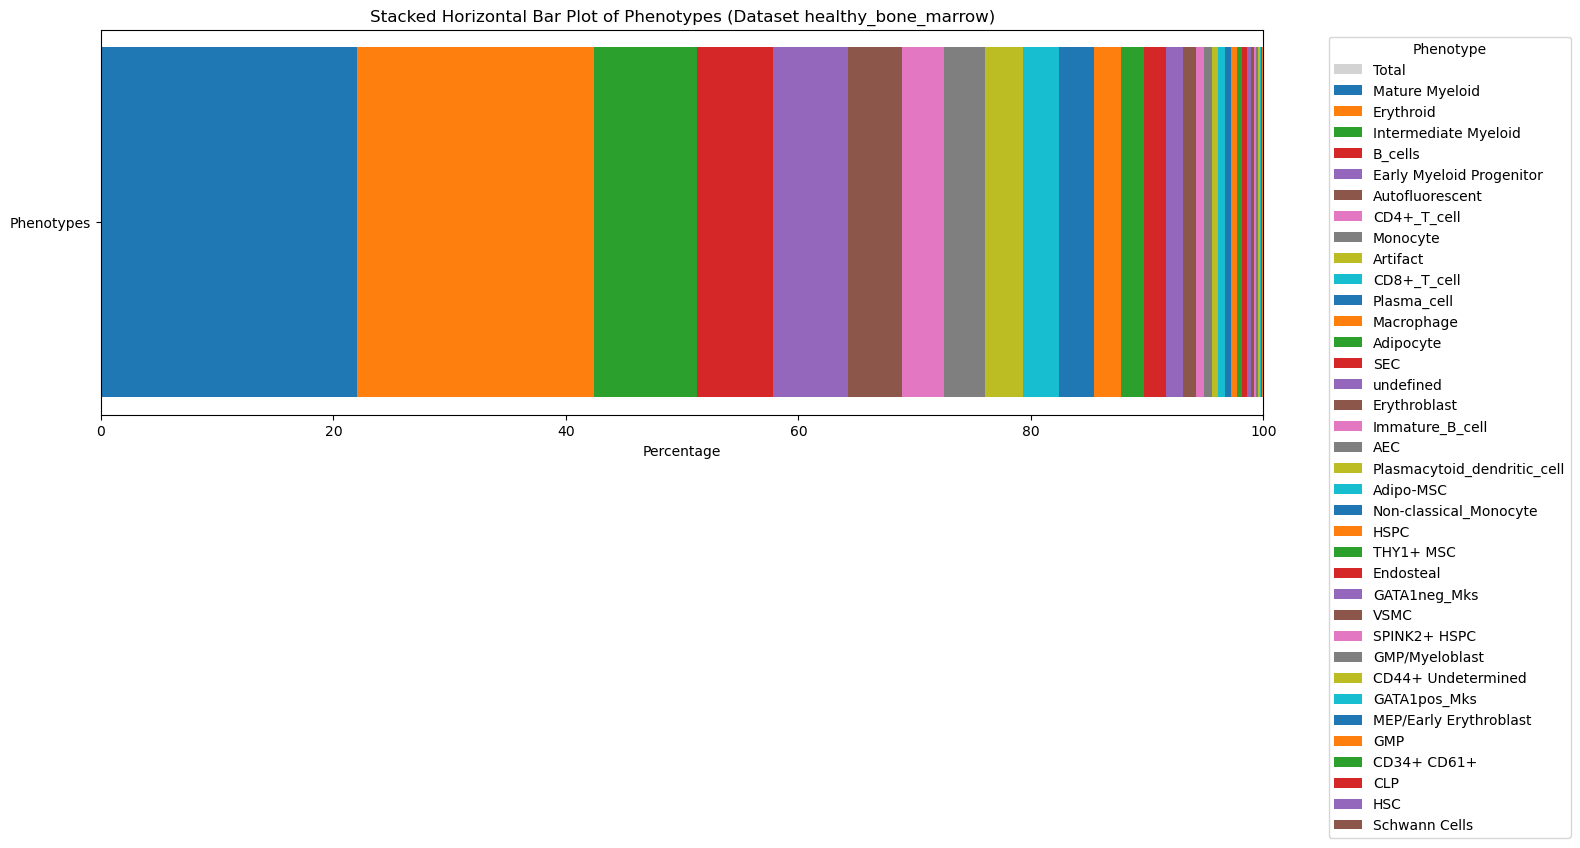

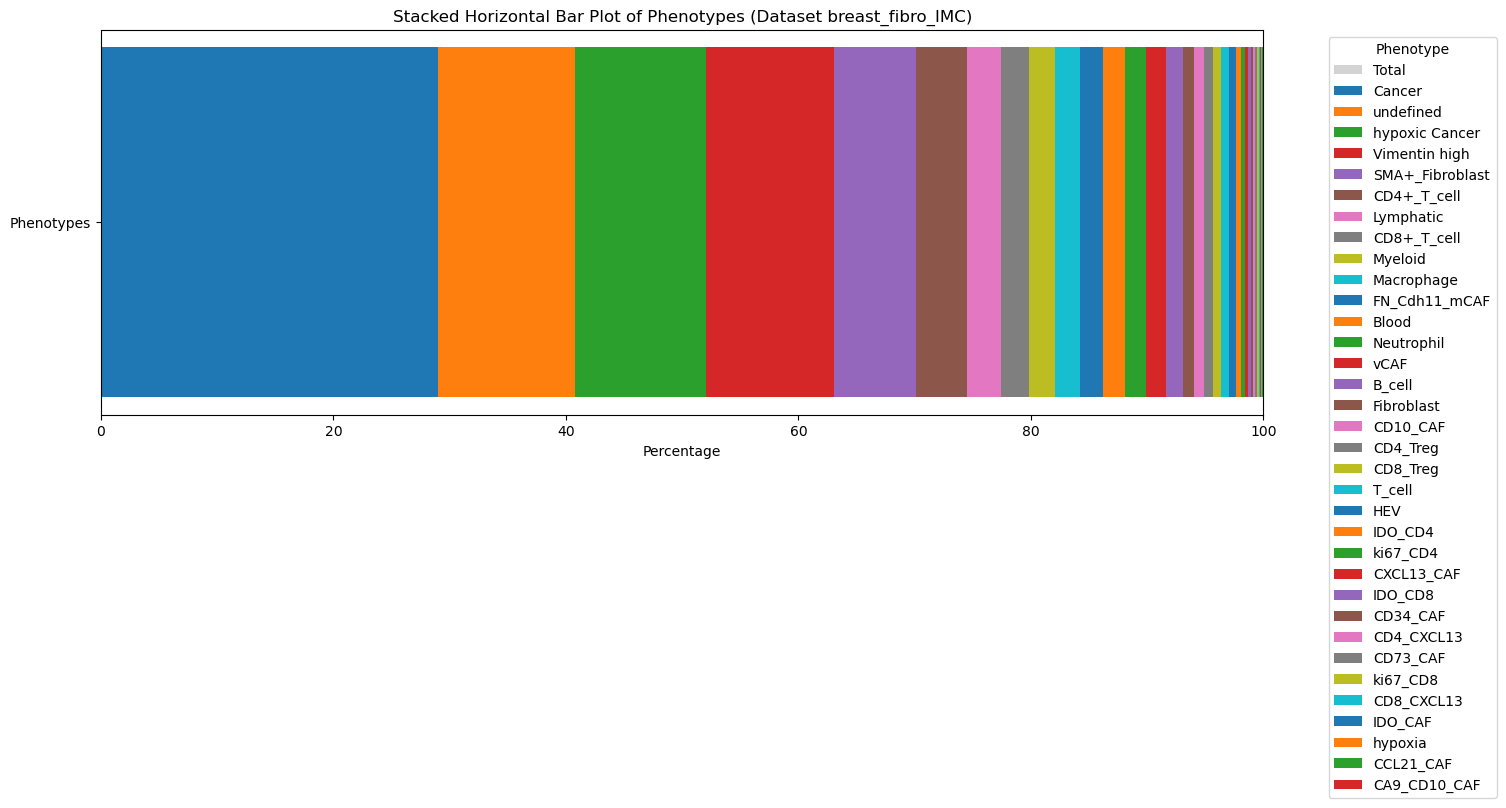

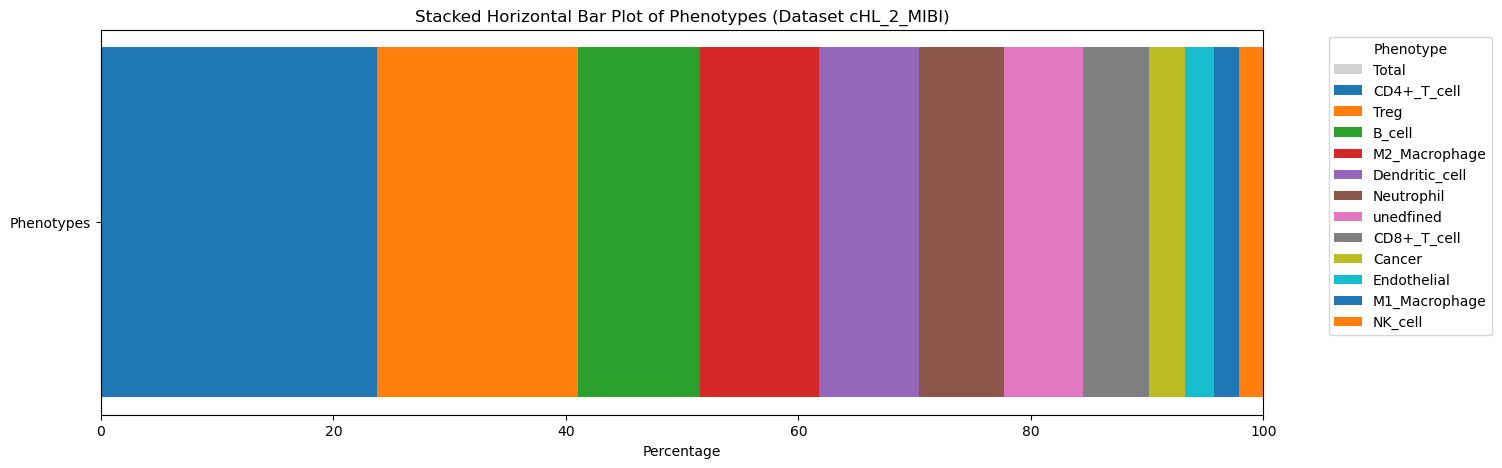

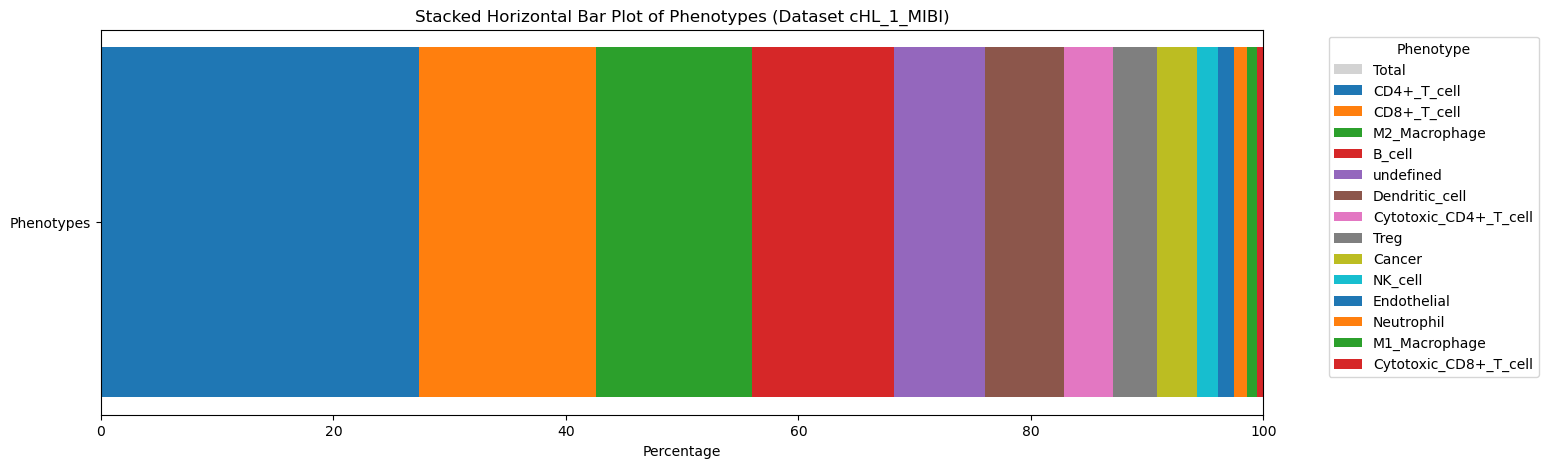

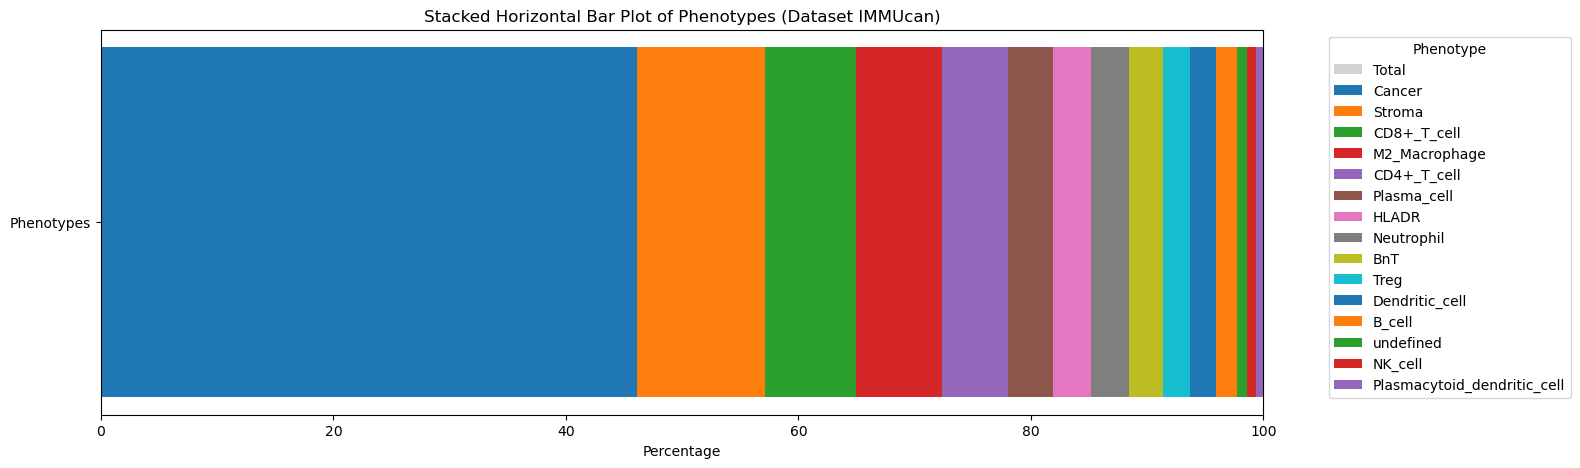

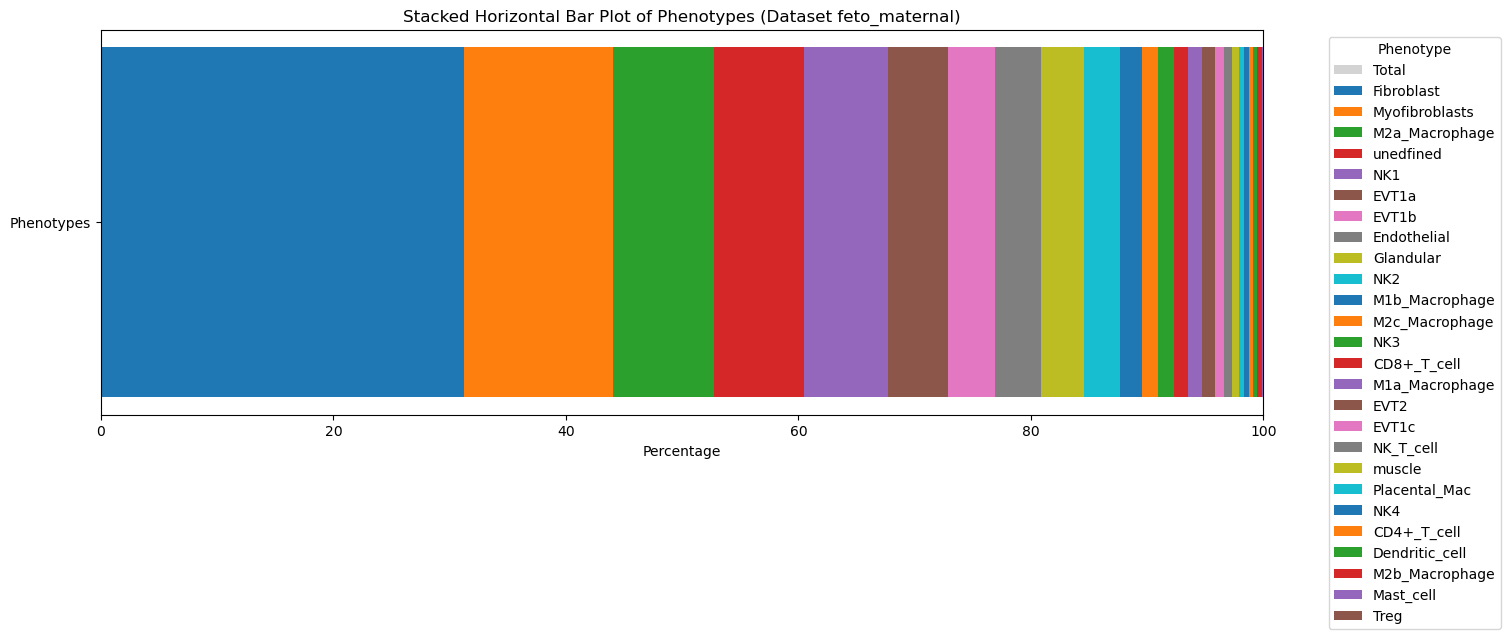

In [ ]:
# Determine the maximum percentage across all dataframes for consistent scaling
max_percentage = 100  # Percentages range from 0 to 100

# Set a consistent figure size
fig_width = 15
fig_height = 5

# Loop through each dataframe in dfs and plot the phenotype percentages
for i, df in enumerate(dfs):
    # Count the occurrences of each phenotype
    phenotype_counts = df['cell_type'].value_counts()

    # Calculate percentages
    total_count = phenotype_counts.sum()
    phenotype_percentages = (phenotype_counts / total_count) * 100

    # Create a single stacked horizontal bar plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.barh(['Phenotypes'], [100], color='lightgray', label='Total', height=0.4)

    # Add individual segments for each phenotype
    left = 0
    for phenotype, percentage in phenotype_percentages.items():
        plt.barh(['Phenotypes'], [percentage], left=left, label=phenotype, height=0.4)
        left += percentage

    # Set consistent x-axis limits
    plt.xlim(0, max_percentage)

        # Add legend and labels
    plt.title(f'Stacked Horizontal Bar Plot of Phenotypes (Dataset {data_list[i]})')
    plt.xlabel('Percentage')
    plt.legend(title='Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# make a df with total number of cells and number of cell types in each dataset
total_cells = []
cell_types = []
for df in dfs:
    total_cells.append(df["cell_type"].count())
    cell_types.append(df["cell_type"].nunique())
# create a dataframe with the data
df = pd.DataFrame({"total_cells": total_cells, "cell_types": cell_types})
# add the dataset names
df["dataset"] = data_list
# set the index to the dataset names
df.set_index("dataset", inplace=True)
# plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=df.index, y="total_cells", data=df, color="blue", label="Total Cells")

# Get dataset stats

In [29]:
# make a df with total number of cells and number of cell types in each dataset
total_cells = []
cell_types = []
for df in dfs:
    total_cells.append(df["cell_type"].count())
    cell_types.append(df["cell_type"].nunique())
    lvl1_cell_types = df["level_1_cell_type"].nunique()
    lvl2_cell_types = df["level_2_cell_type"].nunique()
# create a dataframe with the data
df = pd.DataFrame({"total_cells": total_cells, 
                   "cell_types": cell_types, 
                   "lvl1_cell_types": lvl1_cell_types, 
                   "lvl2_cell_types": lvl2_cell_types})
# add the dataset names
df["dataset"] = data_list
# set the index to the dataset names
df.set_index("dataset", inplace=True)

#save to csv
df.to_csv("../data/data_stats.csv")

df

,total_cells,cell_types,lvl1_cell_types,lvl2_cell_types
dataset,,,,
myeloma_IMC,76387,13,4,9
cHL_CODEX,145161,18,4,9
healthy_bone_marrow,886525,36,4,9
breast_fibro_IMC,553121,34,4,9
cHL_2_MIBI,230889,12,4,9
cHL_1_MIBI,1669853,14,4,9
IMMUcan,457117,15,4,9
feto_maternal,495349,26,4,9


In [30]:
# read metadata
metadata = pd.read_csv("../data/data_meta.csv")

# merge the metadata with the data
df = pd.merge(df, metadata, on="dataset", how="left")

df

,dataset,total_cells,cell_types,lvl1_cell_types,lvl2_cell_types,Platform,Tissue
0,myeloma_IMC,76387,13,4,9,IMC,Bone marrow
1,cHL_CODEX,145161,18,4,9,CODEX,Lymph node
2,healthy_bone_marrow,886525,36,4,9,CODEX,Bone marrow
3,breast_fibro_IMC,553121,34,4,9,IMC,Breast
4,cHL_2_MIBI,230889,12,4,9,MIBI,Lymph node
5,cHL_1_MIBI,1669853,14,4,9,MIBI,Lymph node
6,IMMUcan,457117,15,4,9,IMC,Multiple
7,feto_maternal,495349,26,4,9,MIBI,Decidua


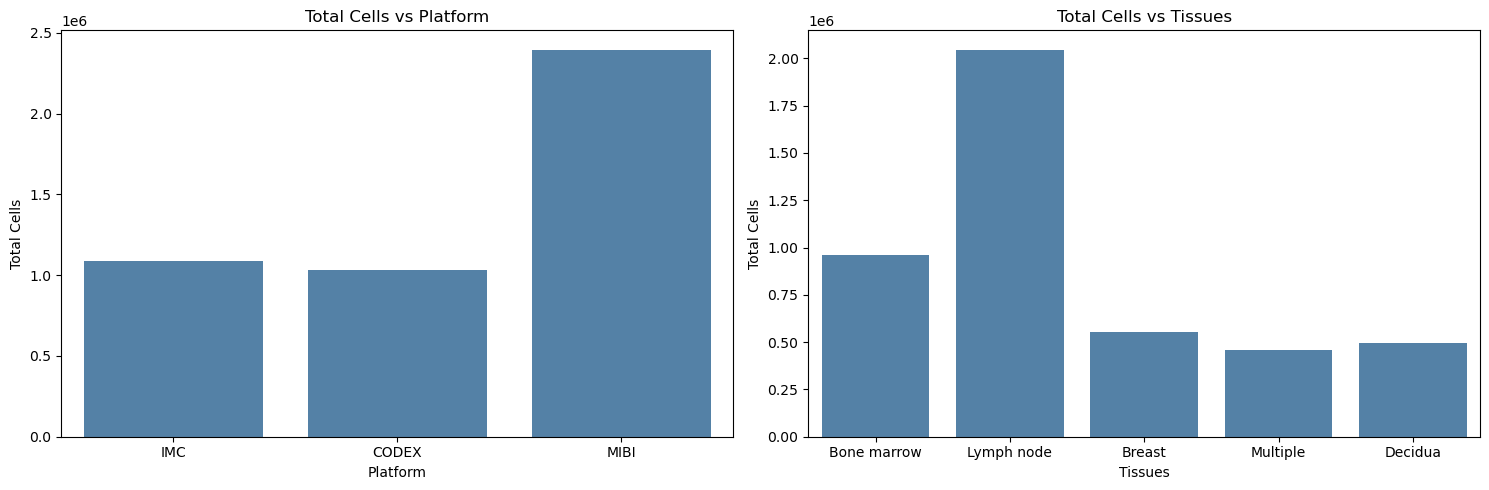

In [49]:
# plot 2 bar plots side by side, one for total cells vs platform and one for total cells vs tissues
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# plot total cells vs platform
sns.barplot(x="Platform", y="total_cells", data=df, ax=axes[0], color="steelblue", errorbar=None, estimator=sum)
axes[0].set_title("Total Cells vs Platform")
axes[0].set_xlabel("Platform")
axes[0].set_ylabel("Total Cells")
# plot total cells vs tissues
sns.barplot(x="Tissue", y="total_cells", data=df, ax=axes[1], color="steelblue", errorbar=None, estimator=sum)
axes[1].set_title("Total Cells vs Tissues")
axes[1].set_xlabel("Tissues")
axes[1].set_ylabel("Total Cells")
plt.tight_layout()
plt.show()

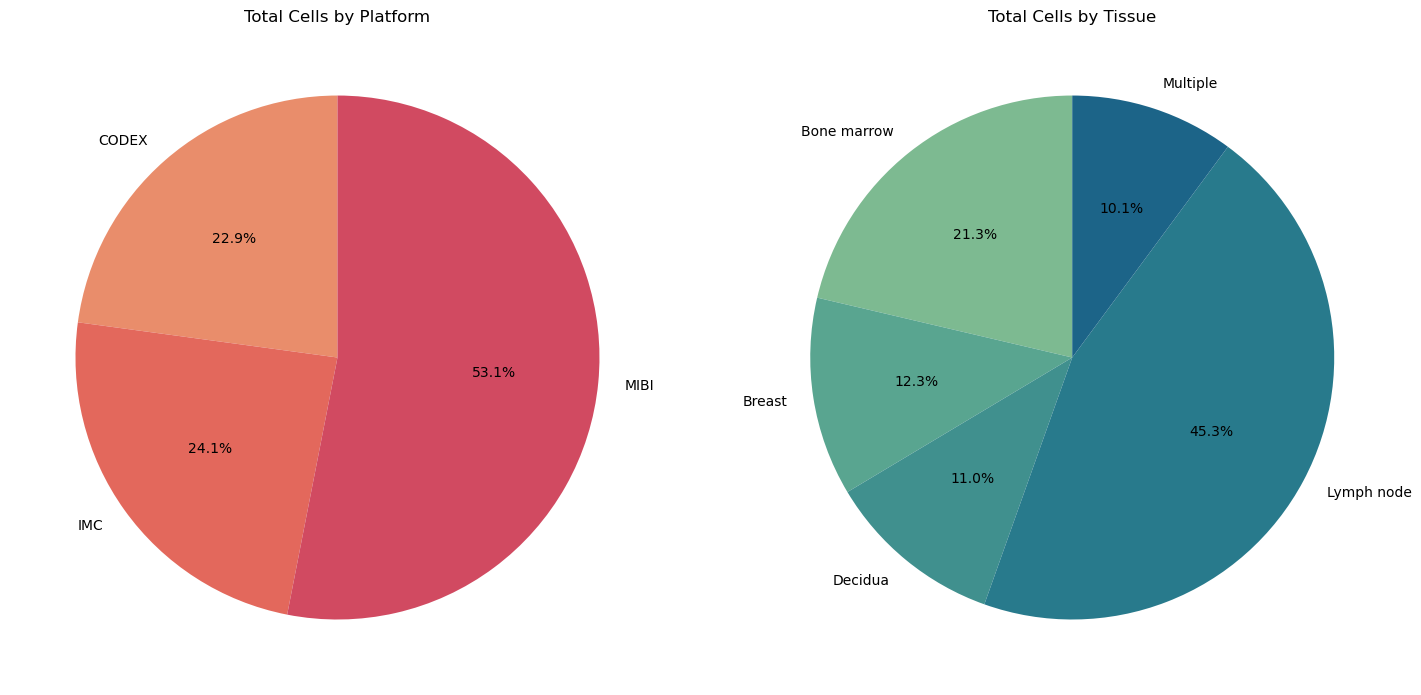

In [56]:
# plot 2 pie charts side by side, one for total cells vs platform and one for total cells vs tissues
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# plot total cells vs platform
platform_data = df.groupby("Platform")["total_cells"].sum()
axes[0].pie(platform_data, labels=platform_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("flare"))
axes[0].set_title("Total Cells by Platform")

# plot total cells vs tissues
tissue_data = df.groupby("Tissue")["total_cells"].sum()
axes[1].pie(tissue_data, labels=tissue_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest"))
axes[1].set_title("Total Cells by Tissue")

plt.tight_layout()
plt.show()

In [45]:
# print the total number of cells
print("Total number of cells: ", df["total_cells"].sum())

Total number of cells:  4514402


## cell types over all datsets

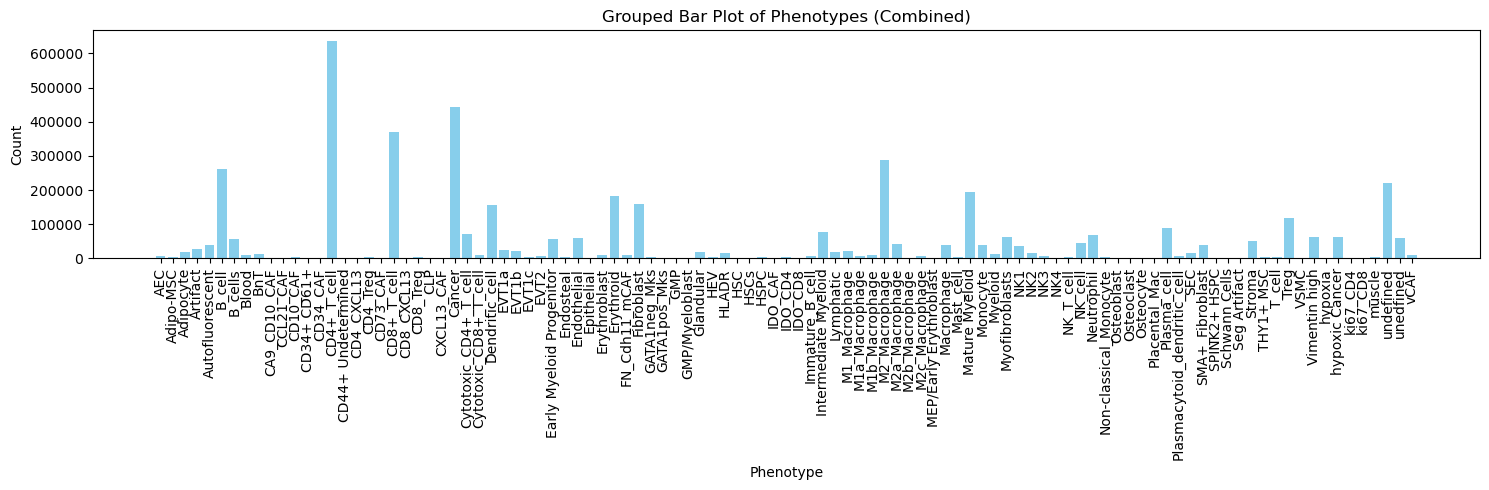

In [21]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

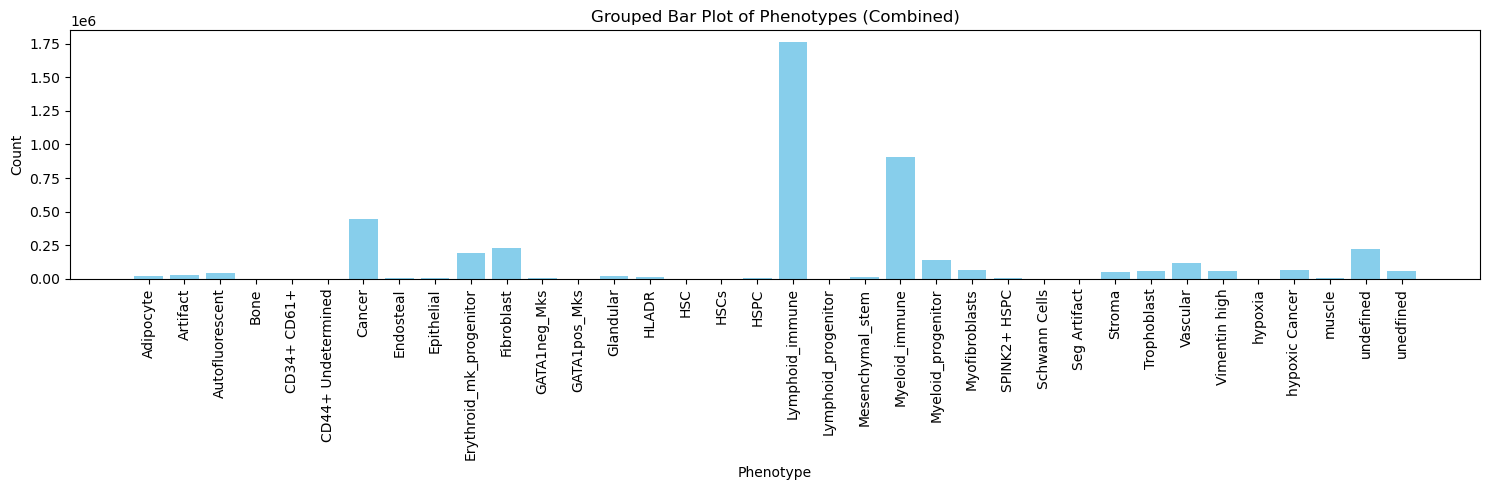

In [23]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['level_2_cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

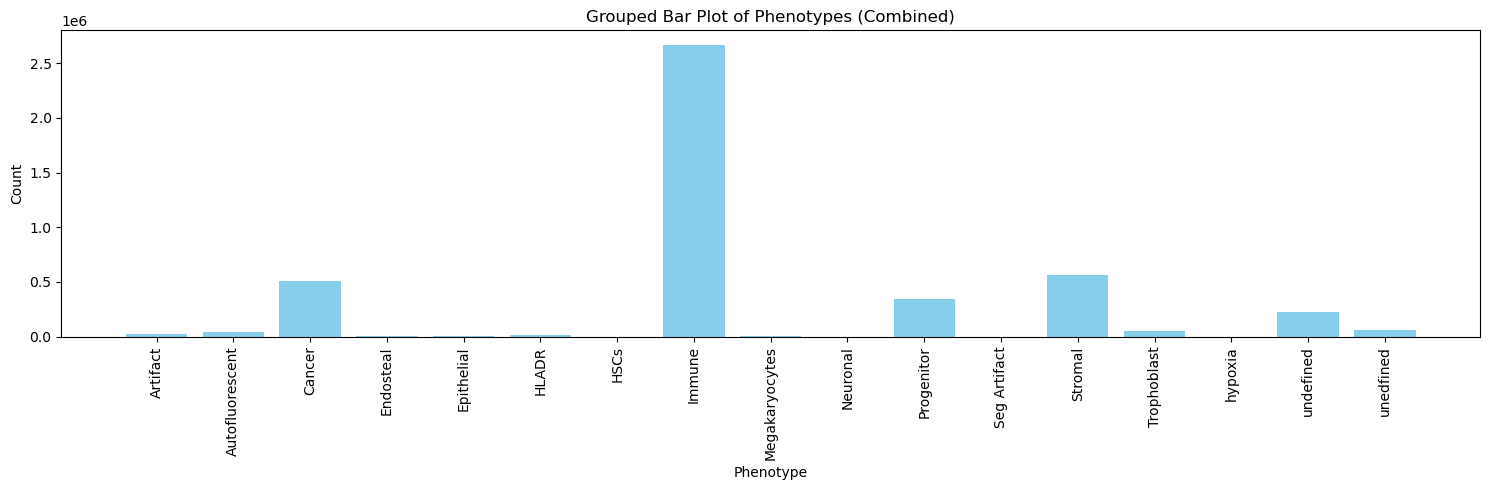

In [24]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['level_1_cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()